In [107]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

## OUTLINE / INTRODUCTION

## Approach/Algorithm 
1. Take the gradient of the loss-function 
2. Pick random starting values for the parameters that are to be estimated
3. Caculate the gradient with the current values
4. Calculate the value for the next step: old_value - learning_rate*gradient(current_values)
5. Back to step 3.

## Generating some dummy-data
For testing/verifying

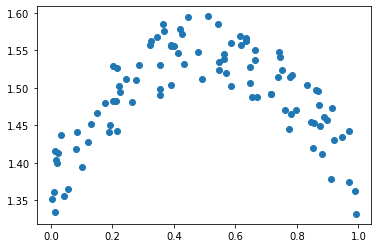

In [115]:
# True values of the parameters - what I'm trying to estimate later
c_true = 1.5
mu_true = 0.5

# Genrating some input and outout data, last term adds 
X = np.random.rand(100,1)
y = c_true*(np.exp(-((X-mu_true)**2)/2)) + np.random.rand(100,1)/10
plt.plot(X, y, 'o')

## Stochastic Gradient Descent
Picking a single value from the data for each step in the algorithm 

In [127]:
###############################################################################################
### 1) HELPER FUNCTIONS
###############################################################################################

# 1.1) Function giving av value/vektor of the estimated y's given the current parameters SECTION 3 IN THE TEST
def f(c,mu,x_vector):
    return c*(np.exp(-((x_vector-mu)**2)/2))


# 1.2 Gradient functions (SECTION 5 IN THE TEST)
# 1.2.1) Function returning the gradient of the loss-function with respect to the parameter mu
def gradient_mu(c,mu,x_vector,y_vector):
    N = len(x_vector)
    return 2*(f(c,mu,x_vector) - y_vector) * c *(np.exp(-((x_vector-mu)**2)/2))*(x_vector-mu)/2

# 1.2.2) Function returning the gradient of the loss-function with respect to the parameter c
def gradient_c(c,mu,x_vector,y_vector):
    N = len(x_vector)
    return 2*(f(c,mu,x_vector) - y_vector) * np.exp(-((x_vector-mu)**2)/2) #/ N

###############################################################################################
### 2) STOCHASTIUC GRADIENT DESCENT FUNCTIION
###############################################################################################

def stochastic_gradient_descent(x_vector, y_vector, learning_rate = 0.01, max_num_steps = 1000):    
    # Pick random starting values for the parameters c and mu
    c = np.random.uniform(0,1,1)
    mu = np.random.uniform(0,1,1)
    
    steps = 0
    while steps < max_num_steps:
        
        # Stochastic element - picking single values for x,y for stochastic gradient descent
        permutation = np.random.permutation(len(x_vector))
        x = x_vector[permutation][0]
        y = y_vector[permutation][0]
        
        # Calculating new parameters for next step
        c = c - learning_rate*gradient_c(c,mu,x,y)
        mu = mu - learning_rate*gradient_mu(c,mu,x,y)
        
        # Updating steps (adding 1)
        steps += 1
    
    return (c,mu)

### Running the model: 

In [128]:
SGD = stochastic_gradient_descent(X,y)
print(f"Real c-value: {c_true} \nReal c-value: {mu_true} \nEstimated c-value: {float(SGD[0])} \nEstimated c-value: {float(SGD[1])}")

Real c-value: 1.5 
Real c-value: 0.5 
Estimated c-value: 1.5573727560314912 
Estimated c-value: 0.5080146772330274


## Mini-batch (Stochastic) Gradient Descent
Selecting a random batch of the data for each step-calculation

In [124]:
###############################################################################################
### 1) HELPER FUNCTIONS
###############################################################################################

# 1.1) Function giving av value/vector of the estimated y's given the current parameters (same as above)
def f(c,mu,x_vector):
    return c*(np.exp(-((x_vector-mu)**2)/2))

# 1.2 Gradient functions. These differs from the ones above in that they calculate the average gradients for all the observations in the vector (given by N)
# 1.2.1) Function returning the gradient of the loss-function with respect to the parameter mu
def gradient_c(c, mu, x_vector, y_vector):     
    N = len(y_vector)
    gradient = 0
    for x, y in zip(x_vector, y_vector):
        gradient += 2*(f(c, mu, x) - y) * np.exp(-((x-mu)**2)/2)
    return gradient/N

# 1.2.1) Function returning the gradient of the loss-function with respect to the parameter mu
def gradient_mu(c, mu, x_vector, y_vector):         
    N = len(y_vector)
    gradient = 0
    for x,y in zip(x_vector, y_vector):
        gradient += 2*(f(c, mu, x) - y) * c *(np.exp(-((x-mu)**2)/2))*(x-mu)/2
    return gradient/N

###############################################################################################
### 2) MINI-BATCH (STOCHASTIC) GRADIENT DESCENT FUNCTIION
###############################################################################################

def mini_batch_gradient_descent(x_vector, y_vector, learning_rate = 0.01, runs = 1000, batch_size=100):  
   # Pick random starting values for the parameters c and mu
    c = np.random.uniform(0,1,1)
    mu = np.random.uniform(0,1,1)
    
    # Stochastic element - picking batch of values from the data
    permutation = np.random.permutation(len(x_vector))
    x = x_vector[permutation][0:batch_size]
    y = y_vector[permutation][0:batch_size]    
    
     # Calculating new parameters
    for i in range(runs):
        c -= learning_rate*gradient_c(c,mu,x,y)
        mu -= learning_rate*gradient_mu(c,mu,x,y)
    
    return (c,mu)

### Running the model

In [125]:
MBGD = mini_batch_gradient_descent(X,y)
print(f"Real c-value: {c_true} \nReal c-value: {mu_true} \nEstimated c-value: {float(MBGD[0])} \nEstimated c-value: {float(MBGD[1])}")

Real c-value: 1.5 
Real c-value: 0.5 
Estimated c-value: 1.556134927271715 
Estimated c-value: 0.558831524759066


## Jacobian
Matrix with values for the first dirivatives -  Section 4 answer 

In [97]:
# Since I used a somewhat different approach I never calculated the jacobian explicitly. Here I present a function returning the jacobian as asked in section 5
def jacobian_matrix(x_vector, c, mu):
    return np.hstack([
        c*(np.exp(-((x_vector-mu)**2)/2))*(x_vector-mu)/2    # derivitve of f with respect to c (param 1)
        , np.exp(-((x_vector-mu)**2)/2)                      # derivitve of f with respect to mu (param 2)
    ])

In [99]:
## With example estimates for the parameters:
J_c = 0.8
J_mu = 0.2

jacobian_matrix(X, J_c, J_mu)

array([[ 0.0227246 ,  0.9983823 ],
       [ 0.0384886 ,  0.99533815],
       [ 0.2176987 ,  0.7876168 ],
       [-0.00445113,  0.99993808],
       [-0.00169103,  0.99999106],
       [ 0.2183674 ,  0.78538734],
       [ 0.17889197,  0.87844821],
       [ 0.11022774,  0.95960537],
       [ 0.05605917,  0.99003053],
       [ 0.17220038,  0.88947334],
       [ 0.01555535,  0.99924299],
       [-0.00285838,  0.99997447],
       [ 0.22443115,  0.76320234],
       [ 0.06593409,  0.98612687],
       [ 0.13823522,  0.93381134],
       [ 0.2046192 ,  0.82518203],
       [ 0.2227382 ,  0.76979498],
       [-0.05703624,  0.9896744 ],
       [ 0.23026946,  0.73719966],
       [-0.06226425,  0.98765699],
       [ 0.21136119,  0.8070944 ],
       [ 0.2244109 ,  0.76328331],
       [ 0.01339501,  0.99943882],
       [ 0.02279585,  0.99837212],
       [ 0.23193885,  0.72850423],
       [ 0.14981294,  0.92056941],
       [ 0.21431208,  0.79837072],
       [ 0.14860874,  0.92202736],
       [ 0.00264849,